In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('./MyDrive')


Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


In [0]:
TRAIN_DIR = "./MyDrive/My Drive/ai/workspace/data/dental_image/train/"

In [0]:
IM_WIDTH = 220
IM_HEIGHT = 220

## CNN을 활용한 치아 이미지 분류 모델 학습

In [0]:
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale= 1.0/255
)

In [6]:
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IM_WIDTH, IM_HEIGHT),
    batch_size=16,
    class_mode="categorical",
    shuffle=True
)

Found 150 images belonging to 3 classes.


## Keras Model 설정

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [8]:
from keras.applications.resnet50 import ResNet50
conv_layers = ResNet50(weights="imagenet", include_top=False, input_shape=(IM_WIDTH, IM_HEIGHT, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [9]:
model = Sequential()
model.add(conv_layers)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 74,969,987
Trainable params: 74,916,867
Non-trainable params: 53,120
_________________________________________________________________


In [11]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=['acc'])

In [12]:
model.fit(train_generator, epochs=30)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
10/10 [==============================] - 22s 2s/step - loss: 2.5917 - acc: 0.5095
Epoch 2/30
10/10 [==============================] - 3s 284ms/step - loss: 1.1324 - acc: 0.7170
Epoch 3/30
10/10 [==============================] - 3s 335ms/step - loss: 0.7967 - acc: 0.7642
Epoch 4/30
10/10 [==============================] - 3s 333ms/step - loss: 0.5982 - acc: 0.7735
Epoch 5/30
10/10 [==============================] - 3s 322ms/step - loss: 0.7598 - acc: 0.7672
Epoch 6/30
10/10 [==============================] - 3s 337ms/step - loss: 0.7560 - acc: 0.8333
Epoch 7/30
10/10 [==============================] - 3s 331ms/step - loss: 0.4926 - acc: 0.8616
Epoch 8/30
10/10 [==============================] - 3s 332ms/step - loss: 0.4525 - acc: 0.9057
Epoch 9/30
10/10 [==============================] - 3s 332ms/step - loss: 0.5246 - acc: 0.8553
Epoch 10/30
10/10 [==============================] 

## 테스트 데이터 평가

In [0]:
TEST_DIR = "./MyDrive/My Drive/ai/workspace/data/dental_image/test/"

In [14]:
test_datagen = ImageDataGenerator(
    rescale= 1.0/255
    )
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size=60,
    class_mode = "categorical",
    shuffle=False
)


Found 60 images belonging to 3 classes.


In [0]:
X_test, y_test = test_generator.next()
predict = model.predict(X_test)

In [0]:
predict = np.argmax(predict, 1)
target = np.argmax(y_test, 1)

In [17]:
pred02 = (predict == target)
acc = np.sum(pred02) / len(pred02)
acc

0.8

In [18]:
predict

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0])

(array([20.,  0.,  0.,  0.,  0., 26.,  0.,  0.,  0., 14.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

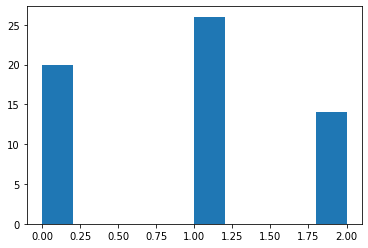

In [19]:
plt.hist(predict)

(array([20.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0., 20.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

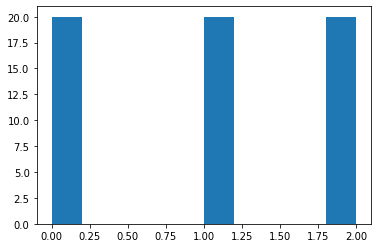

In [20]:
plt.hist(target)

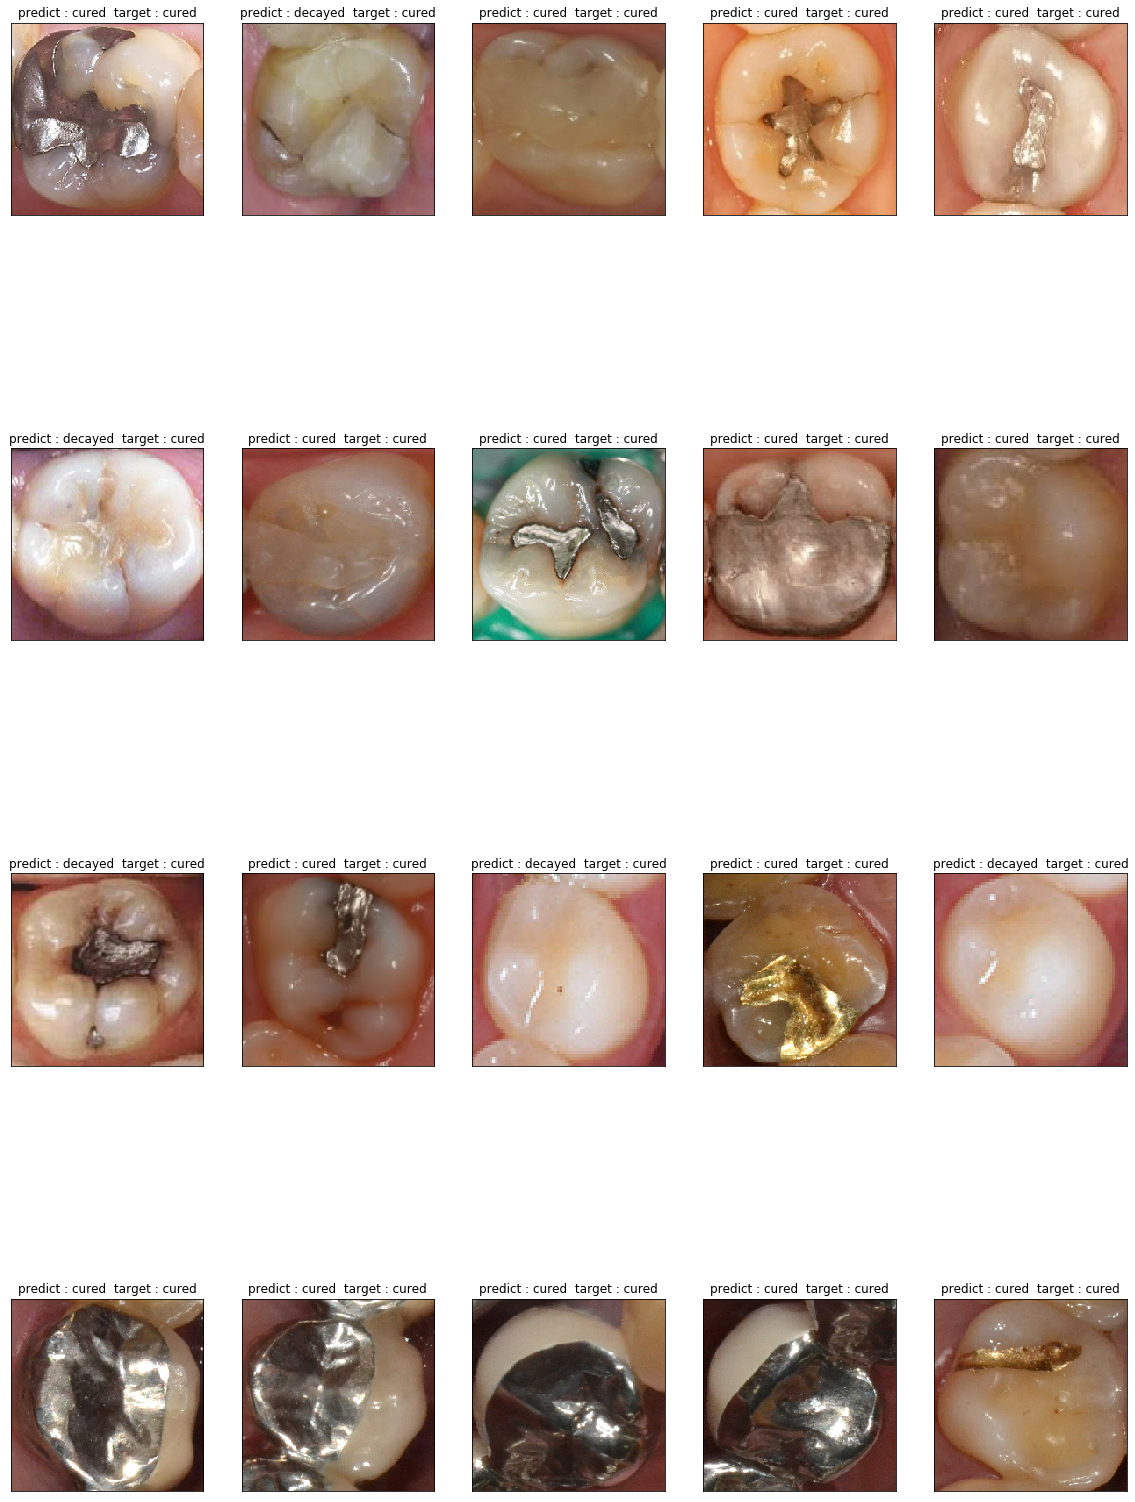

In [21]:
custom_labels = list(train_generator.class_indices.keys())

fig = plt.figure(figsize=(20, 30))
for i in range(20):
    subplot = fig.add_subplot(4, 5, i+1)

    subplot.set_xticks([])

    subplot.set_yticks([])

    predict_num = predict[i]
    predict_str = custom_labels[predict_num]

    target_num = target[i]
    target_str = custom_labels[target_num]

    subplot.set_title(f"predict : {predict_str}  target : {target_str}")

    subplot.imshow(X_test[i], cmap=plt.cm.gray_r)

plt.show()